# UNSUPERVISED LEARNING TECHNIQUES 

### In this chapter, we will analyze some of the unsupervised learning techniques which are KMeans, Hierarchical Clustering, PCA, DBSCAN.

In [ ]:
import pandas as pd

In [2]:
import numpy as np 

In [3]:
import seaborn as sns 

In [4]:
from matplotlib import pyplot as plt 

In [5]:
from sklearn.cluster import KMeans

In [6]:
from sklearn.metrics import silhouette_score

In [7]:
from sklearn.cluster import AgglomerativeClustering

In [8]:
from sklearn import datasets 

In [9]:
iris = datasets.load_iris()

In [10]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [11]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)

In [12]:
data.shape

(150, 4)

In [13]:
type(data)

pandas.core.frame.DataFrame

In [14]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
target = pd.Series(iris.target)

In [20]:
target.shape

(150,)

**I want to create a feature space which will help us to manupilate data easily.**

In [22]:
len(data.columns)

4

In [35]:
X = []
def features(dataframe):
    for i in range(len(dataframe.columns)):
        X.append(dataframe.iloc[:,i])
    return X        

In [36]:
feature_space = features(data)

In [37]:
len(feature_space)

4

In [38]:
X1 = feature_space[0]

In [39]:
X1.shape


(150,)

In [40]:
type(X1)

pandas.core.series.Series

In [41]:
X1.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal length (cm), dtype: float64

In [42]:
# Lets visualize how the features in the data are correlated 

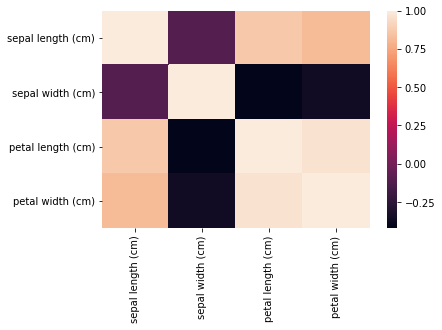

In [43]:
sns.heatmap(data.corr())

In [44]:
# Lets also visualize 2 most correlated features in a scatter plot 

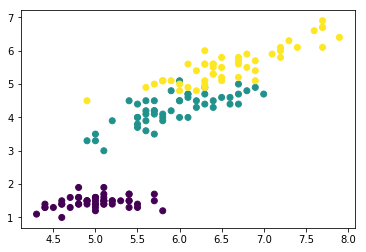

In [45]:
plt.scatter(feature_space[0], feature_space[2], c  = target)

In [46]:
# Lets Move on some Unsupervised Learning Techniques : 

<font size=4> ** I want to implement KMeans algorithm firstly. It is fast and easy to use algorithm which helps us to understand structure in the data if exists. The main challange when applying this algorithm occurs when we decide on "k" value. Since basically there are no labels in unsupervised learning tasks there is also a challenge when evaluating models performance but some techniques are developed such as silhouette score, elbow method. Here we will use inertia which basically returns the sum of squared distances of samples to their closest cluster center. Before that we will implement a function which iterates through different set of values for "k" and return inertia so that we can better pick optimal "k" value. **</font>

In [83]:
list = [] 
def picking_k_value(k,dataframe):
    for i in range(1,k):
        model = KMeans(n_clusters = i, random_state = 44).fit(dataframe)
        inertia = model.inertia_
        list.append(inertia) # for plotting purpose
        print("k:", i , "loss:", inertia)

In [84]:
picking_k_value(10,data)

k: 1 loss: 680.8244
k: 2 loss: 152.36870647733906
k: 3 loss: 78.94084142614602
k: 4 loss: 57.34492380952382
k: 5 loss: 46.53558205128205
k: 6 loss: 38.930963049671746
k: 7 loss: 34.30123936932633
k: 8 loss: 30.077530998389697
k: 9 loss: 27.841073593073595


In [85]:
list

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.34492380952382,
 46.53558205128205,
 38.930963049671746,
 34.30123936932633,
 30.077530998389697,
 27.841073593073595]

In [88]:
s = pd.Series(list)

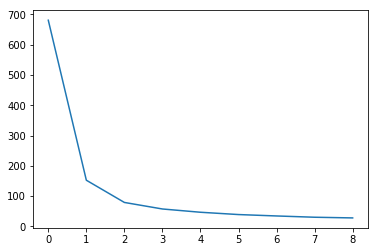

In [89]:
s.plot(kind = "line")

<font size = 4> **It looks like after k = 3 there is no dramatic change in loss function. We can choose 3,4,5,6 etc as number of clusters but here optimal k value is 3.** </font>

In [90]:
model = KMeans(n_clusters = 3)

In [91]:
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [96]:
array = model.predict(data)

In [97]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [98]:
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

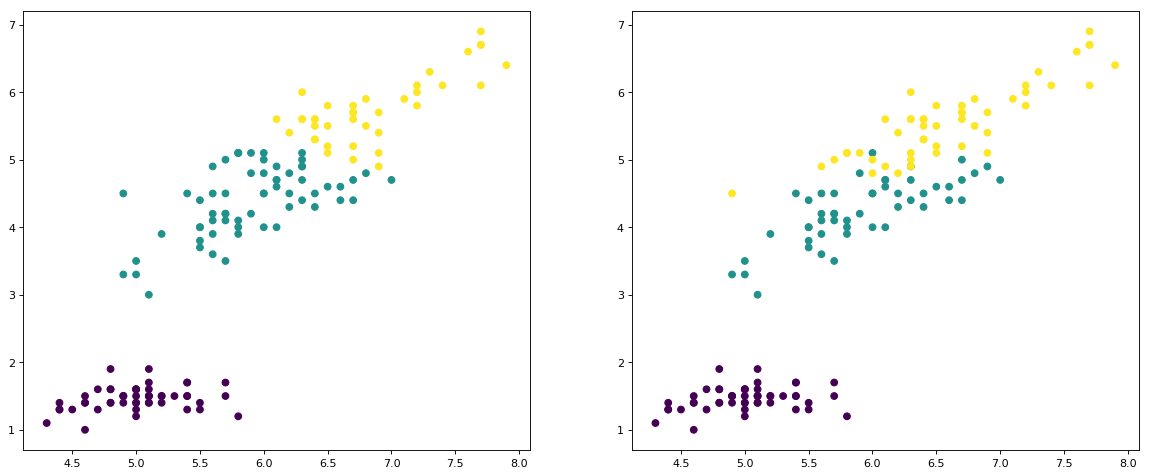

In [105]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2,2,1)
plt.scatter(feature_space[0], feature_space[2], c = array)
plt.subplot(2,2,2)
plt.scatter(feature_space[0], feature_space[2], c = iris.target)
plt.show()

# Hierarchical Clustering 


In [ ]:
# In this part, we will use hiearchical clustering method and visualize it. To do that we need to use scipy.

In [142]:
from scipy.cluster import hierarchy

In [143]:
# This time we will use another  dataset.

In [144]:
dataset = pd.read_csv("https://raw.githubusercontent.com/vihar/unsupervised-learning-with-python/master/seeds-less-rows.csv")

In [145]:
dataset.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
1,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,Kama wheat
2,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,Kama wheat
3,13.99,13.83,0.9183,5.119,3.383,5.234,4.781,Kama wheat
4,14.11,14.26,0.8722,5.520,3.168,2.688,5.219,Kama wheat


In [146]:
# We will predict based on the grain variety feature so it is better to remove it from the original dataframe and store it in 
# another variable

In [147]:
y = dataset[["grain_variety"]]

In [148]:
dataset.shape

(42, 8)

In [149]:
X = dataset.drop("grain_variety", axis = 1)

In [150]:
X.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
1,14.69,14.49,0.8799,5.563,3.259,3.586,5.219
2,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
3,13.99,13.83,0.9183,5.119,3.383,5.234,4.781
4,14.11,14.26,0.8722,5.520,3.168,2.688,5.219


In [151]:
model = hierarchy.linkage(X, method = "ward")

In [152]:
fig = plt.figure(figsize=(15, 10))

<Figure size 1080x720 with 0 Axes>

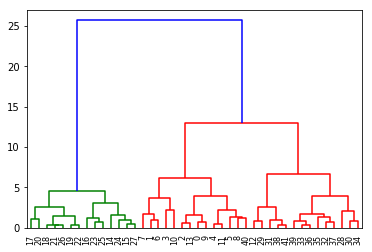

In [154]:
dn = hierarchy.dendrogram(model)

# Principal Component Analysis ( PCA ) 

<font size = 4>**Unsupervised Learning includes Dimensionality Reduction techniques. One of the most eminent example is doing PCA when trying to
reduce the feature space by reducing dimensions. It is pretty nifty when dataset contains features that are strongly correlated
with each other so that keeping only one sample would be enough to make some predictions. It is also pretty convenient to 
remove noise from the data by applying PCA. Basically components capture the variance ( information ) in the data. First 
component is capturing greater variance and second has the second greatest variance in the data and so on. We can decide how
many components we want to keep by looking the total variance captured by components. It is pretty convenient to keep components
that capture greater than %80 of the variance in the data.
There is one thing to note before applying PCA to our dataset: PCA is scale invariant which means that we need to scale our data first before we apply PCA on it.**</font>

In [156]:
from sklearn.decomposition import PCA 

In [157]:
df = datasets.load_iris()

In [159]:
data = df.data

In [160]:
target = df.target

In [165]:
data.shape

(150, 4)

In [166]:
from sklearn.preprocessing import MinMaxScaler

In [167]:
scaler = MinMaxScaler()

In [169]:
data2 = scaler.fit_transform(data)

In [173]:
data2[0:5]    # to see how our data is transformed through scaling.

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [187]:
pca = PCA(n_components = 2, random_state = 55)

In [188]:
transformed_data = pca.fit_transform(data)

In [189]:
pca.explained_variance_ratio_

array([0.84141901, 0.11732474])

In [197]:
transformed_data[0:5]

array([[-0.63036125,  0.11155626],
       [-0.62354631, -0.1003132 ],
       [-0.6697928 , -0.04722006],
       [-0.65463305, -0.09879127],
       [-0.64826327,  0.13755769]])

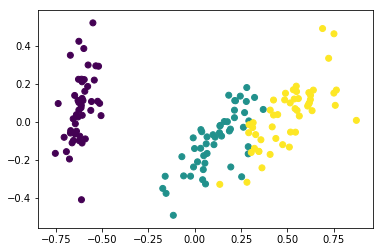

In [198]:
plt.scatter(transformed_data[:,0], transformed_data[:,1], c = target)


In [199]:
# We managed to reduce the dimension in our data to 2. Since some variables are strongly correlated with each other we did not 
# lose significant variance ( information ) in our data. Greater variance == greater amount of information kept 

# Density Based Spatial Clustering Application with Noise ( DBSAN ) 

<font size = 4 > **In this part, we will look through the DBSCAN algorithm which is pretty nifty when we want to check the noise 
    in our data. It clusters data points based on their distance and it has 2 main parameters which are epsilon and min_samples.
    Epsilon determines how far our algorithm check for another data point ( think is as a radius of a circle ) and min_samples 
    determines how many data points required to form a dense region.** </font>

In [215]:
data = datasets.load_breast_cancer()

In [216]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [217]:
df3 = data.data

In [218]:
df3.shape

(569, 30)

In [219]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [220]:
df3 = pd.DataFrame(df3, columns = data.feature_names)

In [221]:
df3.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [222]:
y = data.target

In [241]:
y.shape

(569,)

In [242]:
# Before I apply DBSCAN, I would like to quickly rescale the data and apply PCA 

In [243]:
from sklearn.preprocessing import StandardScaler

In [244]:
scaler = StandardScaler()

In [245]:
df4 = scaler.fit_transform(df3)

In [246]:
df4.shape

(569, 30)

In [247]:
df4[0]

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

In [248]:
df5 = pd.DataFrame(df4, columns = data.feature_names)

In [249]:
df5.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [250]:
pca2 = PCA(0.95)

In [251]:
pca2.fit(df5)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [252]:
pca2.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

In [253]:
reduced_data = pca2.transform(df5)

In [254]:
type(reduced_data)

numpy.ndarray

In [255]:
reduced_data.shape

(569, 10)

In [257]:
# We managed to reduce the dimension from 30 to 10 while keeping 0.95 of the variance in the data. Lets apply DBSCAN for further 
#investigation 

In [280]:
from sklearn.cluster import DBSCAN

In [399]:
dbscan = DBSCAN(eps = 2.3, min_samples = 10)

In [400]:
clustered = dbscan.fit(reduced_data)

In [401]:
clustered.labels_

array([-1,  0,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0,
       -1, -1,  0,  0,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0,  0, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1,  0,  0,
       -1,  0, -1, -1, -1,  0,  0, -1, -1, -1, -1,  0,  0,  0, -1, -1,  0,
        0, -1, -1,  0,  0,  0, -1,  0,  0, -1, -1,  0, -1,  0,  0,  0, -1,
        0,  0,  0, -1,  0,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1, -1, -1,
       -1,  0,  0, -1,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0,
       -1,  0, -1, -1,  0, -1,  0,  0,  0, -1, -1, -1,  0,  0, -1, -1, -1,
        0,  0,  0, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0, -1, -1,  0,
        0,  0, -1, -1,  0, -1, -1, -1,  0,  0, -1, -1,  0, -1,  0, -1, -1,
        0,  0,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0,  0,  0, -1, -1,
        0,  0,  0, -1,  0,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1,  0,
        0,  0,  0,  0,  0

In [402]:
## In order to visualize it we need to reduce dimension again. This part is just for plotting purposes. 

In [403]:
pca = PCA(n_components = 2)

In [404]:
reduced2 = pca.fit_transform(df5)

In [405]:
reduced2

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [406]:
reduced2.shape

(569, 2)

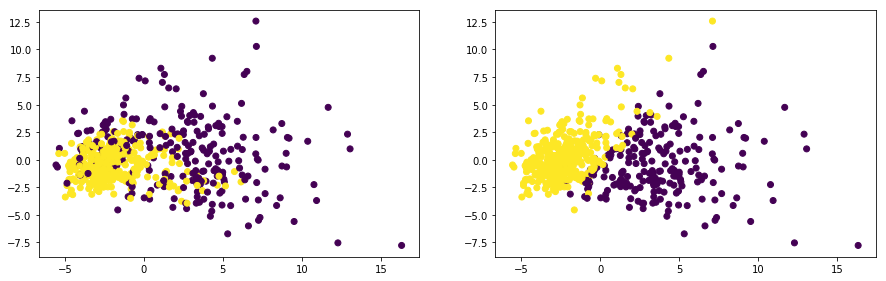

In [407]:
fig = plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
plt.scatter(reduced2[:,0], reduced2[:,1], c = clustered.labels_)
plt.subplot(2,2,2)
plt.scatter(reduced2[:,0], reduced2[:,1], c = y)


In [408]:
# We can arrange eps and min_samples parameters for different clustering labels. It may yield better results but here we just
# showed how we apply DBSCAN to our dataset